# Gaussian Mixtures Models clustering

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn import datasets
from sklearn.mixture import GaussianMixture
import pandas as pd
import seaborn as sns

# Iris dataset

## Load the iris dataset

In [ ]:
iris = datasets.load_iris()

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
X = iris.data[:, :2]
d = pd.DataFrame(X)

## Plot the distribution

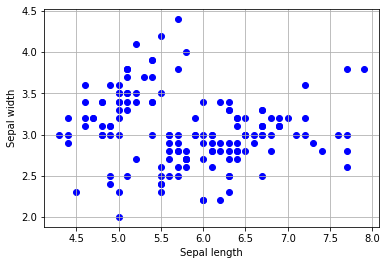

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.grid(True)
ax.scatter(d[0], d[1], c ='blue')
plt.show()

## Fit GMM 

In [ ]:
gmm = GaussianMixture(n_components = 3)
gmm.fit(d)

GaussianMixture(n_components=3)

In [ ]:
labels = gmm.predict(d)
labels

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

## Show clusters

In [ ]:
# Assign a label to each sample
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]

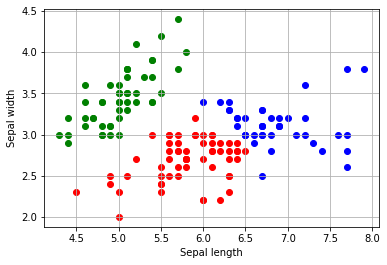

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.grid(True)
ax.scatter(d0[0], d0[1], c ='red')
ax.scatter(d1[0], d1[1], c ='blue')
ax.scatter(d2[0], d2[1], c ='green')
plt.show()

## Print statisics

In [ ]:
# converged log-likelihood 
print(gmm.lower_bound_)

-1.4987505566235166


In [ ]:
# number of iterations required to converge
print(gmm.n_iter_)

8


# Blob dataset

In [ ]:
# Generating 5000 samples using make_blobs
dataset, clusters = make_blobs(n_samples = 500, n_features = 3, cluster_std = 0.9, random_state = 0)

## Data distribution

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


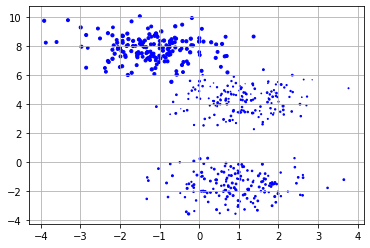

In [ ]:
plt.scatter(dataset[:, 0], dataset[:, 1], dataset[:, 2], c='blue');
plt.grid()
plt.show()

## Applying GMM

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(dataset)

GaussianMixture(n_components=3)

## Predicting

In [ ]:
#predictions from gmm
labels = gmm.predict(dataset)
frame = pd.DataFrame(dataset)

## Plotting

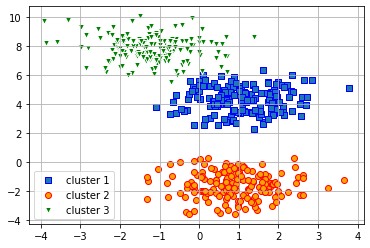

In [ ]:
plt.scatter(dataset[clusters == 0, 0],
            dataset[clusters == 0, 1],
            cmap='red',
            marker='s',
            edgecolors = 'b',
            label='cluster 1')

plt.scatter(dataset[clusters == 1,0],
            dataset[clusters == 1,1],
            c ='orange',
            marker='o',
            edgecolors = 'r',
            label='cluster 2')

plt.scatter(dataset[clusters == 2,0],
            dataset[clusters == 2,1],
            c='green',
            marker='v',
            edgecolors = 'w',
            label='cluster 3')

plt.legend(loc='lower left')
plt.grid()
plt.show()